In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Unsupervised learning: basics

In [ ]:
# How does the algorithm decide which articles are similar? 
# It is the result of an # unsupervised learning algorithm
# It scans through the text of each article
# based on frequently occurring terms -- groups articles together

# What is unsupervised learning? 
# It is an umbrella term for a group of machine learning algorithms that are used to find patterns. 
# The data that is used in these algorithms is not labeled, classified or characterized prior to running the algorithm. 
# The algorithm is run, therefore, to find and explain inherent structures within the data. 
# Common unsupervised learning algorithms are clustering, anomaly detections, and neural networks. 
# Clustering is used to group similar data points together --
# items in a single group are closer to each other in terms of some characteristics as compared to items in other clusters
# distance between points in a 2D plane

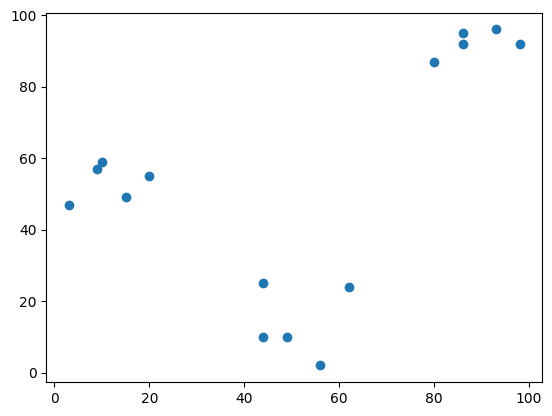

In [2]:
x_coordinates = [80, 93, 86, 98, 86, 9, 15, 3, 10, 20, 44, 56, 49, 62, 44]
y_coordinates = [87, 96, 95, 92, 92, 57, 49, 47, 59, 55, 25, 2, 10, 24, 10]

plt.scatter(x_coordinates, y_coordinates)
plt.show()

## Basics of cluster analysis

In [ ]:
# What is a cluster?
# group of items with similar characteristics
# a cluster of news articles has similar words and word associations appearing in them
# segmentation of customers based on their spending habits
# density based DBSCAN technique, Gaussian models
# two most common techniques - hierarchical and k-means clustering

In [ ]:
# Heirarchical Clustering
# all the points are considered as individual clusters
# cluster center -- mean of attributes of all data points in a cluster
# cluster centers will have two attributes - the mean of x and y coordinates
# -- cluster centers of all clusters are the coordinates of the individual points
# next -- the distances between all pairs of cluster centers are computed
# the two closest clusters are merged
# The cluster center of the merged cluster is then recomputed
# This process of merging the two closest clusters continues until we arrive at the desired clusters
# At every step, the number of clusters reduces by one

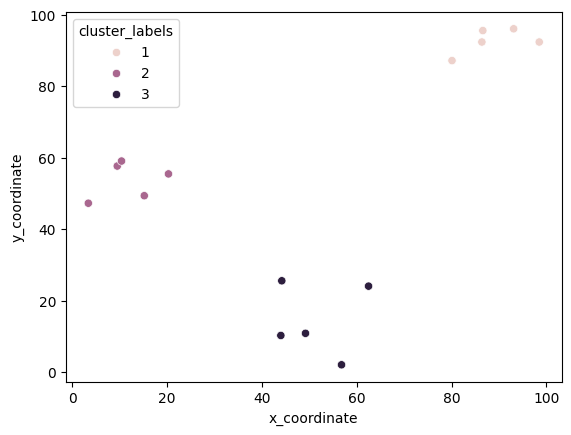

In [4]:
# required methods for hierarchical clustering, linkage and fcluster, are stored in scipy.cluster.hierarchy

from scipy.cluster.hierarchy import linkage, fcluster

x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4, 10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4, 47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]

df = pd.DataFrame({'x_coordinate': x_coordinates, 'y_coordinate': y_coordinates})

# linkage -- computes distances between intermediate clusters
Z = linkage(df, 'ward')

#fcluster -- generates clusters and assigns associated cluster labels to a new column in the DataFrame
df['cluster_labels'] = fcluster(Z, 3, criterion= 'maxclust')

sns.scatterplot(x = 'x_coordinate', y = 'y_coordinate', hue = 'cluster_labels', data = df)
plt.show()

In [ ]:
# k-mean clustering
# a random cluster center is generated for each of the clusters
# next -- the distance to these cluster centers is computed for each point to assign to the closest cluster
# cluster centers are recomputed
# This iteration of assigning points to the recomputed cluster centers is performed a predefined number of times
# K-means clustering is implemented using methods kmeans and vq of scipy.cluster.vq
# The centroids of the clusters are computed using kmeans and cluster assignments for each point are done through vq
# The second argument in both methods is distortion, which we capture in a dummy variable

/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_4877/2180569725.py:3: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed((1000,2000))


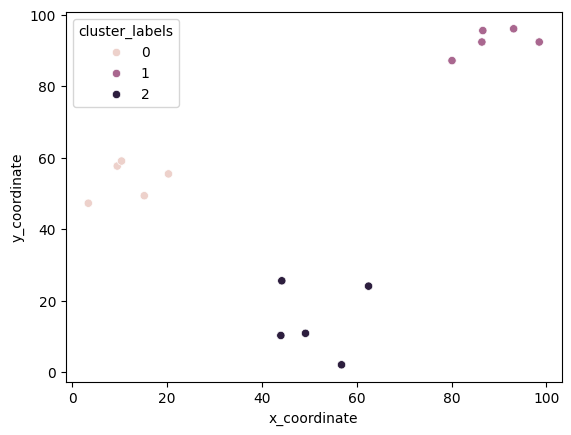

In [7]:
import random
from scipy.cluster.vq import kmeans, vq
random.seed((1000,2000))
centroids,_ = kmeans(df,3)
df['cluster_labels'], _ = vq(df, centroids)

sns.scatterplot(x = 'x_coordinate', y = 'y_coordinate', hue = 'cluster_labels', data = df)
plt.show()

## Data Preparation for Cluster Analysis

In [ ]:
# why?
# variables are in incomparable units
# variables with same units have vastly different scales and variances
# data in raw form may lead to bias 
# clusters maybe heavily dependent on one variable
# -- Normalization of the individual variables -- rescale data to a std deviation of 1
# x_new = x/ st_dev(x)


In [8]:
# normalization library
from scipy.cluster.vq import whiten

# initiate the data to be normalized in a list and then use the whiten -- to transform.
data = [5, 1, 3, 3, 2, 3, 3, 8, 1, 2, 2, 3, 5]
scaled_data = whiten(data)
print(scaled_data)



[2.72733941 0.54546788 1.63640365 1.63640365 1.09093577 1.63640365
 1.63640365 4.36374306 0.54546788 1.09093577 1.09093577 1.63640365
 2.72733941]


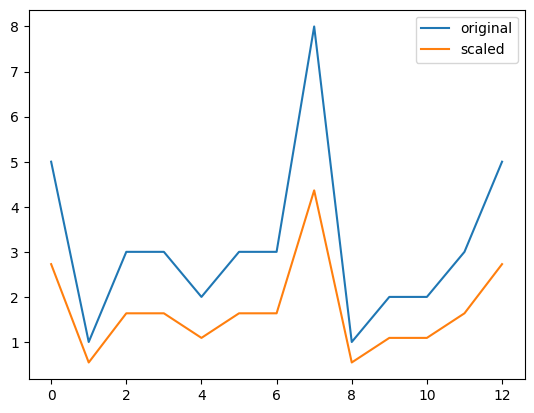

In [10]:
plt.plot(data, label = 'original')
plt.plot(scaled_data, label = 'scaled')
plt.legend()
plt.show()

# serial number of the points is in the x axis
# value of the original and scaled data points is in the y axis

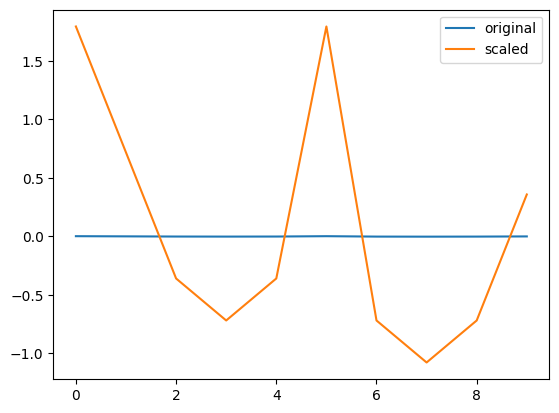

In [11]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

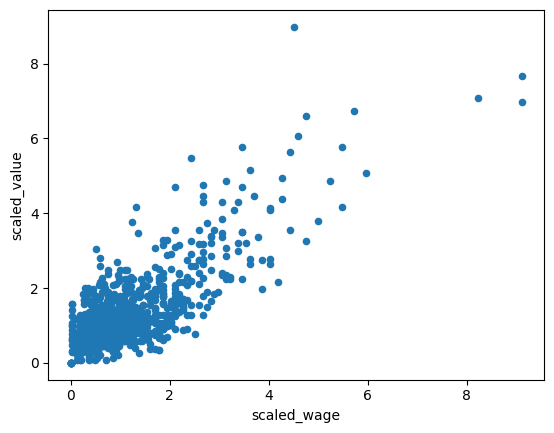

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064


In [14]:

fifa = pd.read_csv('/Users/priyachaudhuri/Desktop/SSB TERM 1/Artificial intelligence/fifa_18_sample_data.csv')
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind = 'scatter')
plt.show()

# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())

## Heirarchical

In [ ]:
# critical step -- compute the distance matrix at each stage

#scipy.cluster.hierarchy.linkage(observation, 
                                #method = 'single',
                                #metric = 'euclidean',
                                #optimal_offering = False)

# method - how to calculate proximity between 2 clusters
## single - two closest objects
## complete - two farthest objects
## average - arithmetic mean of all objects 
## centroid - geometric mean of all objects
## median - median of all objects
## ward - difference between summed squares of their joint clusters minus the individual summed squares
# ---- The ward method focuses on clusters more concentric towards its center

# metric - distance metric
# optimal ordering - order data points -- Optional

#scipy.cluster.hierarchy.fclusters(distance_matrix, 
                                # num_clusters,
                                # criterion)
# distance_matrix - output of linkgae()
# num_clusters - number of clusters
# criterion - how to deicde thresholds to form clusters

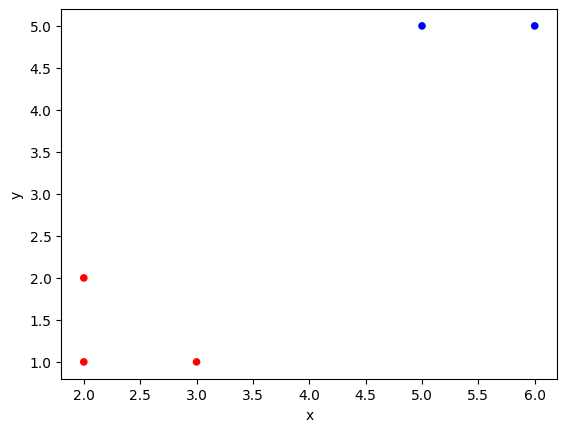

In [17]:
# Visualize?
# to make sense of the clusters formed
# additional step for validation
# spot trend

#matplotlib
df = pd.DataFrame({'x': [2,3,5,6,2],
                   'y': [1,1,5,5,2],
                   'labels': ['A','A','B','B','A']})

# we need to manually map each cluster to a color
colors = {'A': 'red', 'B': 'blue'}

df.plot.scatter(x='x', y='y', c = df['labels'].apply(lambda x: colors[x]))
plt.show()

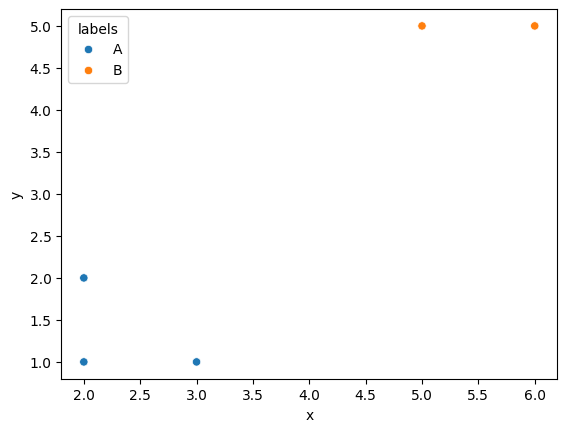

In [18]:
#seaborn - convenient
df = pd.DataFrame({'x': [2,3,5,6,2],
                   'y': [1,1,5,5,2],
                   'labels': ['A','A','B','B','A']})

colors = {'A': 'red', 'B': 'blue'}

sns.scatterplot(x='x', y='y', hue = 'labels', data = df)
plt.show()

In [ ]:
# how many clusters?
# dendrogram - graphical branching diagram that shows progression in a linkage

from scipy.cluster.hierarchy import dendrogram

Z = linkage(df[['x_whiten', 'y_whiten']],
            method = 'ward',
            metric = 'euclidean')
dn = dendrogram(Z)
plt.show()

# each inverted U represents a cluster divided into its two child clusters
# inverted U at the top of the figure represents a single cluster of all the data points
# width of the U shape represents the distance between the two child clusters
# A wider U - the two child clusters were farther away from each other as compared to a narrower U in the diagram
# if you draw a horizontal line at any part of the figure
# the number of vertical lines it intersects tells you the number of clusters at that stage
# the distance between those vertical lines indicates the inter-cluster distance

In [25]:
# limitations 
# runtime increases with increase in no. of data points
# quadratic increase
# not feasible for large datasets

import random, timeit

points = 100
df = pd.DataFrame({'x': random.sample(range(0,points), points),
                   'y': random.sample(range(0,points), points)})

%timeit linkage(df[['x','y']], method = 'ward', metric = 'euclidean')

The slowest run took 5.29 times longer than the fastest. This could mean that an intermediate result is being cached.
2.21 ms ± 1.18 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            0.987373           1.849142
2                            3.013487           4.063492
3                            1.934455           3.210802


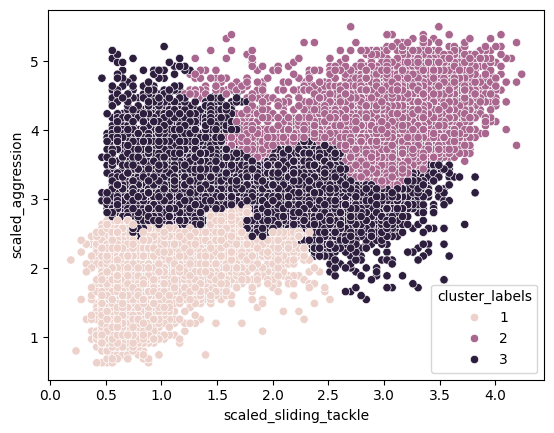

In [28]:
fifa = pd.read_csv('/Users/priyachaudhuri/Desktop/SSB TERM 1/Artificial intelligence/fifa_18_dataset.csv')

fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])

# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()

## K-Mean

In [ ]:
# works faster on large datasets
# ne important use of k-means clustering on images is to segment satellite images to identify surface features

# generate cluster centers
## kmeans(obs, k_or_guess, iter, thresh, check_finite) -- returns cluster centres and distortion (single value)
### obs - standardized observarions
### k_or_guess - no. of clusters
### iter - no. of iterations (default: 20)
### thresh - threshold (default: 1e-05) -- the algorithm is terminated if the change in distortion since the last k-means iteration is less than or equal to the threshold
### check_finite - whether to check if observations contain only finite numbers (default: True)
### contd...--- if a check needs to be performed on the data for the presence of infinite or NaN values 
#distortion - sum of square of distances between the data points and cluster centers

# generate cluster labels
## vq(obs, code_book, check_finite = True) -- returns list of cluster labels and distortions (list)
### code_book - cluster centers : first output of the kmeans method

# mean(list of distortions from the vq method) ~  distortion value of the kmeans method if the same list of observations is passed

In [ ]:
cluster_centers,_ = kmeans(df[['x_sclaed','y_scaled']],3)
df['cluster_labels'],_ = vq(df[['x_sclaed','y_scaled']], cluster_centers)
sns.scatterplot(x ='x_scaled', y = 'y_scaled', hue = 'cluster_labels', data=df)
plt.show()

In [ ]:
# how many clusters?
# no absolute method to find right number of clusters
# indicative method -- avg silhoutte, gap stats, elbow method -- fails when data is evenly distributed
# distortion decreases with increase in no. of clusters
# This trend is intuitive - as segmenting the data into smaller fragments will lead to clusters being closer together, leading to a lower distortion
# becomes 0 when the number of clusters  equals to the number of data points
# elbow plot - line plot between cluster centers and distortion

In [ ]:
distortions = []

num_clusters = range(2,7)

for i in num_clusters:
    centroids, distortion = kmeans(df[['scaled_x','scaled_y']],i)
    distortions.append(distortions)

elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters,
                                'distortions': distortions})
sns.lineplot(x = 'num_clusters', y = 'distortions', data  = elbow_plot_data)
plt.show()

In [30]:
# limitations
# how to find right number of clusters -- elbow method -- may not always works
# impact of seeds
## process of defining the initial cluster centers is random, this initialization can affect the final clusters
## he effect of seeds is only seen when the data to be clustered is fairly uniform
## If the data has distinct clusters before clustering is performed - the effect of seeds will not result in any changes in the formation of resulting clusters
# biased towards equal sized clusters

                scaled_def  scaled_phy
cluster_labels                        
0                 1.946013    7.159409
1                 2.067430    9.055970
2                 3.814488    9.023955


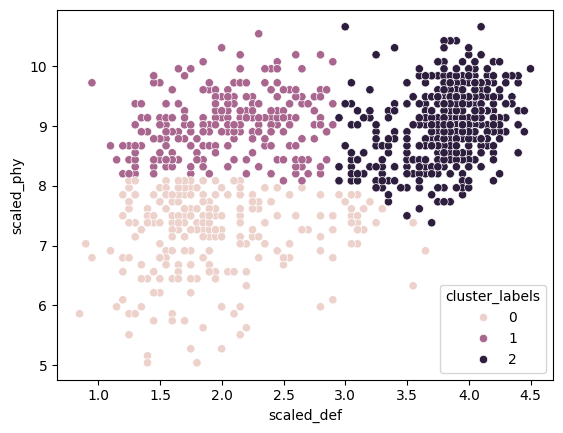

In [32]:

fifa = pd.read_csv('/Users/priyachaudhuri/Desktop/SSB TERM 1/Artificial intelligence/fifa_18_sample_data.csv')
# Scale wage and value
fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_phy'] = whiten(fifa['phy'])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers 
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)
plt.show()

## Real World

In [38]:
# convert image to pictures -- matplotlib.image.imread
# comvert colors of cluster centers -- matplotlib.pyplot.imshow

import matplotlib.image as img
image = img.imread('/Users/priyachaudhuri/Desktop/SSB TERM 1/Artificial intelligence/sea.jpg')
image.shape
 # --- (475, 764, 3) -- MxNx3 -- M and N are dimension


(176, 287, 3)

In [39]:
# Store RGB values of all pixels in lists r, g and b
r = []
g = []
b = []

for row in image:
    for pixel in row:
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

pixels = pd.DataFrame({'red': r,
                       'blue': b,
                       'green': g})
pixels.head()

## -- elbow at 2

,red,blue,green
0,230,230,230
1,230,230,230
2,230,230,230
3,230,230,230
4,230,230,230


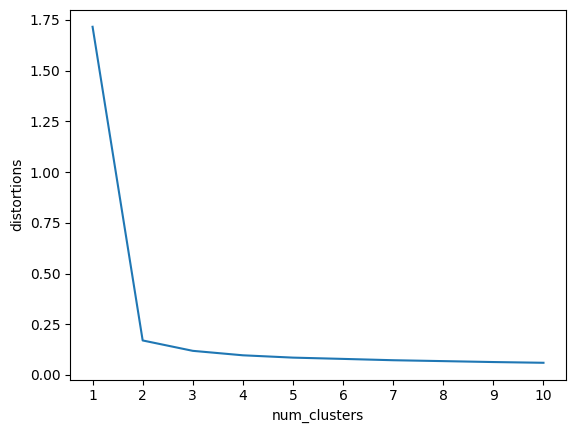

In [41]:

pixels['scaled_red'] = whiten(pixels['red'])
pixels['scaled_blue'] = whiten(pixels['blue'])
pixels['scaled_green'] = whiten(pixels['green'])

distortions = []

num_clusters = range(1,11)

for i in num_clusters:
    centroids, distortion = kmeans(pixels[['scaled_red','scaled_blue', 'scaled_green']],i)
    distortions.append(distortion)

elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters,
                                'distortions': distortions})
sns.lineplot(x = 'num_clusters', y = 'distortions', data  = elbow_plot_data)
plt.xticks(num_clusters)
plt.show()

[(0.13615986886201425, 0.33551062825038835, 0.2821622643632517), (0.8922128973980689, 0.8990353391137449, 0.8969779547826017)]


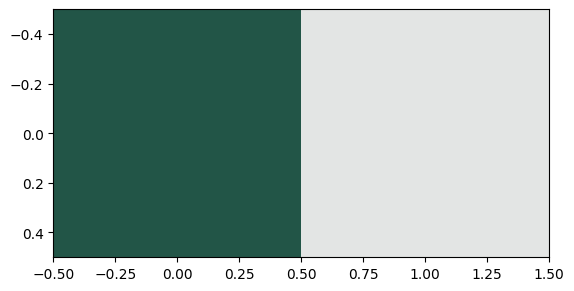

In [43]:
cluster_centers,_ = kmeans(pixels[['scaled_red','scaled_blue', 'scaled_green']], 2)

colors = []
r_std, g_std, b_std = pixels[['red','blue', 'green']].std()

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors.append((
        scaled_r * r_std/255,
        scaled_g * g_std/255,
        scaled_b * b_std/255
    ))

print(colors)
plt.imshow([colors])
plt.show()


In [45]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.7/281.7 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [52]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/priyachaudhuri/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [53]:
# document clustering

# clean data before processing -- remove include punctuation, emoticons and words such as "the, is, are"
# find the TF-IDF of the terms, or a weighted statistic that describes the importance of a term in a document
# we cluster the TF-IDF matrix
# display the top terms in each cluster


# The text in itself cannot be analyzed before converting into smaller parts called tokens
# using NLTK's word_tokenize method
# we remove all special characters from tokens and check if it contains to any stop words
# we return the cleaned tokens

from nltk.tokenize import word_tokenize
import re

def remove_noise(text, stop_words = []):
    tokens = word_tokenize(text)
    cleaned_tokens = []
    for token in tokens:
        token = re.sub('[^A-Za-z0-9]+', '', token)
        if len(token) > 1 and token.lower() not in stop_words:
            #Get lowercase
            cleaned_tokens.append(token.lower())

    return cleaned_tokens

remove_noise("It is lovely weather we are having. I hope the weather comtinues.")

# -- work with hyperlinks and emoticons
# -- normalize words (ran, running, run -> run)


['it',
 'is',
 'lovely',
 'weather',
 'we',
 'are',
 'having',
 'hope',
 'the',
 'weather',
 'comtinues']

In [ ]:
# elevant terms have been extracted a matrix is formed, with the terms and documents as dimensions
# An element of the matrix signifies how many times a term has occurred in each document
# Most elements are zeros, hence, sparse matrices are used to store these matrices more efficiently
# A sparse matrix only contains terms which have non zero elements.

# TF-IDF (Term Frequency - Inverse Document Frequency) - weighted measure  -- evaluate how important a word is to a document in a collection
# we use the TfidfVectorizer class of sklearn
# We initialize it with the following features: max_df and min_df signify the maximum and minimum fraction of documents a word should occur in 
# here we go ahead with terms that appear in more than 20% but less than 80% documents
# We keep the top 50 terms
# Finally, we use our custom function as a tokenizer
# The fit_transform method creates the TF-IDF matrix for the data, which is a sparse matrix

In [ ]:
from sklearn.feature.extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df = 0.8, max_feature = 50,
                                    min_df = 0.2, tokenizer = remove_noise)

tfidf_matrix = tfidf_vectorizer.fit_transform(data)

# kmeans in scipy does not work with sparse matrices
# so we convert the tfidf matrix to its expanded form using the todense method

cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

# -- .todense() may not work on large datasets
# We do not use the elbow plot - take an erratic form due to the high number of variables

# top term per cluster 
# cluster centers - lists with a size equal to the number of terms
# each value in the cluster center in important
# create a dict and print top terms

In [ ]:
# To find the top terms, we first create a list of all terms. 
# Then, we create a dictionary with the terms are keys and tfidf as values. 
# We then sort the dictionary by its values in descending order and display top terms. 
# Zip method joins two lists in python.
terms = tfidf_vectorizer.get_feature_names_out()

for i in range(num_clusters):
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key = center_terms.get(), reverse = True)
    print(sorted_terms[:3])

In [56]:
fifa = pd.read_csv('/Users/priyachaudhuri/Desktop/SSB TERM 1/Artificial intelligence/fifa_18_sample_data.csv')
# Scale wage and value
fifa['scaled_heading_accuracy'] = whiten(fifa['heading_accuracy'])
fifa['scaled_volleys'] = whiten(fifa['volleys'])
fifa['scaled_finishing'] = whiten(fifa['finishing'])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_heading_accuracy', 'scaled_volleys','scaled_finishing']], 2)

# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_heading_accuracy', 'scaled_volleys','scaled_finishing']], cluster_centers)


# you can check how the cluster centers vary with respect to the overall data
# cluster centers of some features do not vary significantly with respect to the overall data -- can drop that feature in the next run
# cluster centers
print(fifa.groupby('cluster_labels')[['scaled_heading_accuracy', 'scaled_volleys',
'scaled_finishing']].mean())


# If one or more clusters are significantly smaller than the rest -- double if their cluster centers are similar to other clusters
# If yes -  reduce the number of clusters in subsequent runs
# cluster sizes

print(fifa.groupby('cluster_labels')['ID'].count())

# In this case, you notice that the 1st cluster is significantly smaller
# It is because we have performed clustering on three attacking attributes
# for which goalkeepers have a very low value as indicated by the cluster centers
# the smaller cluster is composed primarily of goalkeepers

                scaled_heading_accuracy  scaled_volleys  scaled_finishing
cluster_labels                                                           
0                              0.710196        0.639003          0.579890
1                              3.208366        2.832726          2.764816
cluster_labels
0    114
1    886
Name: ID, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

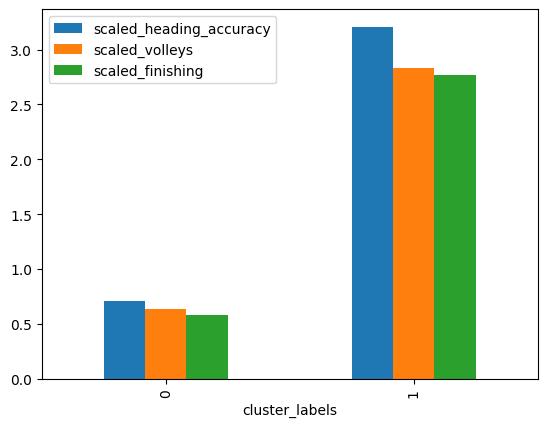

In [69]:
fifa.groupby(['cluster_labels'])[['scaled_heading_accuracy','scaled_volleys','scaled_finishing']].mean().plot(kind = 'bar')
plt.show

In [71]:
# top 5 players

for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])

1 ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'R. Lewandowski']
0 ['M. Neuer' 'De Gea' 'T. Courtois' 'G. Buffon' 'J. Oblak']


In [72]:
# Print the size of the clusters
print(fifa.groupby('cluster_labels')['ID'].count())

# Print the mean value of wages in each cluster
print(fifa.groupby('cluster_labels')['eur_wage'].mean())

cluster_labels
0    114
1    886
Name: ID, dtype: int64
cluster_labels
0    50692.982456
1    71843.115124
Name: eur_wage, dtype: float64


In [ ]:
# Create centroids with kmeans for 2 clusters
cluster_centers,_ = kmeans(fifa[scaled_features], 2)

# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)
print(fifa.groupby('cluster_labels')[scaled_features].mean())

# Plot cluster centers to visualize clusters
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar')
plt.show()

# Get the name column of first 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])

In [ ]:
# Feature reduction
# Two popular tools to reduce the number of features are factor analysis and multidimensional scaling. 